<div class="alert alert-block alert-info">
    <img style="float: right;" src="./material/OSE.svg" width="50">
    <u><h1>The Career Decisions of Young Men</h1></u>
</div>

This notebook processes and explores the estimation sample used by Michael Keane and Kenneth Wolpin to study the career decisions of young men. 

> Keane, M. P. and Wolpin, K. I. (1997). [The career decisions of young men](http://www.journals.uchicago.edu/doi/10.1086/262080). *Journal of Political Economy*, 105(3), 473-522.

The sample is based on the [National Longitudinal Survey of Youth 1979 (NLSY79)](https://www.bls.gov/nls/nlsy79.htm) which is available to download [here](https://github.com/structDataset/career_decisions_data/blob/master/KW_97.raw). 

## Preparations

We first peform some basic preparations to ease further processing.

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

# We ensure a proper formatting of the wage variable.
pd.options.display.float_format = '{:,.2f}'.format

# We label and format the different columns.
columns = ['Identifier', 'Age', 'Schooling', 'Choice', 'Wage']
dtype = {'Identifier': np.int, 'Age': np.int,  'Schooling': np.int,  'Choice': 'category'}

# We read the original data file.
df = pd.DataFrame(np.genfromtxt('KW_97.raw'), columns=columns).astype(dtype)

# We label the different choice categories.
df['Choice'].cat.categories = ['Schooling', 'Home', 'White', 'Blue', 'Military']

# We set the index for easier interpretability.
df['Period'] = df['Age'] - 16
df.set_index(['Identifier', 'Period'], inplace=True, drop=True)

## Basic Structure

First we explore the basic structure of the dataset. All individuals enter the model initially at the same age and are then observed for a varying number of consecutive years. Each year, the individual's decision to work in either a white or blue collar occupation, attend school, enroll in the miliary, or remain at home is recorded. If working, the dataset potentially also contains that year's wage as a full-time equivalent.

In [2]:
df.head(15)

Age  Schooling     Choice      Wage
Identifier Period                                     
6          0        16         11  Schooling       nan
           1        17         12  Schooling       nan
           2        18         13  Schooling       nan
           3        19         14  Schooling       nan
           4        20         15  Schooling       nan
           5        21         16       Home       nan
           6        22         16      White 14,062.67
           7        23         16      White 15,921.17
           8        24         16      White 18,602.73
           9        25         16      White 19,693.95
           10       26         16      White 20,611.00
7          0        16         10  Schooling       nan
           1        17         11  Schooling       nan
           2        18         12       Blue 18,795.29
           3        19         12   Military  9,647.86

The figure below illustrates the decision tree in the model. In each period, individual can decide anew to either work in the labor market, go to school, or simply stay at home.

![title](material/fig-decision-tree.png)

We start it with more than 1,300 observations at age 16, but then end up with less than 300 for age 26.

 ![title](material/fig-observed-data-sample.png)

## Basic Descriptives

Now we are ready to reproduce some descriptive statistics from the paper.

### Choices

We reproduce the distribution of individuals across the different alternatives as reported in Tabel 1.

In [3]:
pd.crosstab(index=df['Age'], columns=df['Choice'], margins=True)

Choice,Schooling,Home,White,Blue,Military,All
Age,,,,,,
16,1178,145,4,45,1,1373
17,1014,197,15,113,20,1359
18,561,296,92,331,70,1350
19,420,293,115,406,107,1341
20,341,273,149,454,113,1330
21,275,257,170,498,106,1306
22,169,212,256,559,90,1286
23,105,185,336,546,68,1240
24,65,112,284,416,44,921


 A more visually appealing version is presented below.
 
 ![title](material/fig-observed-data-choices.png)

### Wages

We reproduce the average real wages by occupation as reported in Table 4.

In [4]:
tab = pd.crosstab(index=df['Age'], columns=df['Choice'], values=df['Wage'], aggfunc='mean', margins=True)
tab[['All', 'White', 'Blue', 'Military']]

Choice,All,White,Blue,Military
Age,,,,
16,"10,217.74","9,320.76","10,286.74",nan
17,"11,036.60","10,049.76","11,572.89","9,005.36"
18,"12,060.75","11,775.34","12,603.82","10,171.87"
19,"12,246.68","12,376.42","12,949.84","9,714.60"
20,"13,635.87","13,824.01","14,363.66","10,852.51"
21,"14,977.00","15,578.14","15,313.45","12,619.37"
22,"17,561.28","20,236.08","16,947.90","13,771.56"
23,"18,719.84","20,745.56","17,884.95","14,868.65"
24,"20,942.42","24,066.64","19,245.19","15,910.84"


We show average wages and their standard devision in the figures below.

![title](material/fig-observed-wage-mean.png)
 
![title](material/fig-observed-wage-std.png)

### Initial Schooling

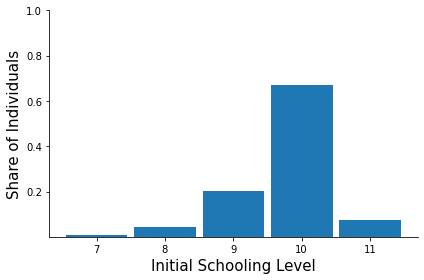

In [8]:
data_info = pkl.load(open("KW_97_info.pkl", "rb"))

sample_size = float(data_info["num_obs"][0])
schooling_counts = data_info["Initial Schooling"]["counts"]

years = sorted(schooling_counts.keys())
edu_level_counts = [schooling_counts[edu_level] for edu_level in sorted(schooling_counts.keys())]
edu_level_freq = list(map(lambda x: x / sample_size, edu_level_counts))

fig, ax = plt.subplots(1, 1)
ax.bar(years, edu_level_freq, 0.9)

ax.set_xlabel('Initial Schooling Level')

ax.set_ylim([0, 1])
ax.set_ylabel('Share of Individuals')
ax.yaxis.get_major_ticks()[0].set_visible(False)

plt.savefig("./material/fig-distribution-initial-schooling")